# Testing Redshift Tomographic Bins

In [2]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
import scripts.plotting_scripts.plotting as p
import scripts.plotting_scripts.plot_helpers as ph
import matplotlib.pyplot as plt
from scripts.nz_metrics import NZMetrics
from scripts.presets import Presets
from scripts.tomographic_binning import TomographicBinning
from scripts.srd_redshift_distributions import SRDRedshiftDistributions
ccl_version = ccl.__version__

I am using pyccl version 2.8.0


In [3]:
# This analysis will be done for a cosmology with the following parameters
# if you want to change the cosmology, you can do it here or just run without it.
# For now, we will keep it as is.
#cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

# The class has default values for the maximal redshift and the resolution of redshifts.
# You can change them if you want to or run the default values.
# Since we are investigating the impact of the resolution of redshifts,
# we will keep the maximal redshift as is (for now) and only change the redshift resolution.
redshift_max = 3.5
redshift_resolution_1 = 300  # this is the first resolution of redshifts
redshift_resolution_2 = 5000  # this is the second resolution of redshifts
forecast_year = "1"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution_1,
                  forecast_year=forecast_year)
redshift_range = presets.redshift_range
# Initialise the tomographic binning class
bin = TomographicBinning(presets)
# Get your source and lens redshift distributions
sources = SRDRedshiftDistributions(presets).source_sample()
lenses = SRDRedshiftDistributions(presets).lens_sample()
# Get the source and lens tomo bins
source_bins = bin.source_bins()
lens_bins = bin.lens_bins()
# Get the bin centers for the source and lens bins
source_bin_centers = bin.source_bin_centers()
lens_bin_centers = bin.lens_bin_centers()
# Now we can initialize the NZMetrics class
# This class contains metrics that can be used to compare
# different redshift distributions and tomographic bins.
nzm = NZMetrics(presets)
data_path = "data_output/bin_centers/"
plot_path = "plots_output/"


Data saved to data_output/redshift_distributions/source_sample_y1.npy
Data saved to data_output/redshift_distributions/lens_sample_y1.npy
Data saved to data_output/redshift_distributions/source_bins_y1.npy
Data saved to data_output/redshift_distributions/lens_bins_y1.npy
Data saved to data_output/redshift_distributions/source_bins_y1.npy
Data saved to data_output/redshift_distributions/lens_bins_y1.npy


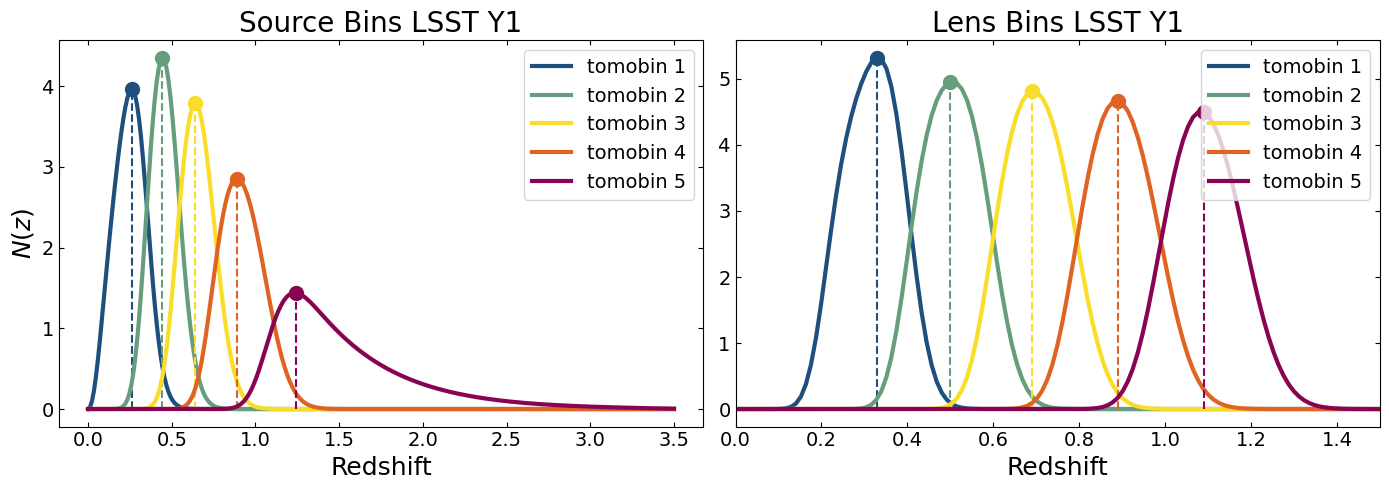

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

source_colors = ph.get_colors(len(source_bins))
lens_colors = ph.get_colors(len(lens_bins))
lw=3
# Plot for source bins on the first panel
for i in source_bins.keys():
    axes[0].plot(redshift_range, source_bins[i], lw=lw, c=source_colors[i], label=f"tomobin {i+1}")
    axes[0].vlines(x=source_bin_centers[i], ymin=0, ymax=np.max(source_bins[i]), color=source_colors[i], linestyle='--')
    axes[0].scatter(source_bin_centers[i], np.max(source_bins[i]), color=source_colors[i], s=100)
    axes[0].legend(loc='upper right', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
axes[0].set_xlabel("Redshift", fontsize=18)
axes[0].set_ylabel("$N(z)$", fontsize=18)
axes[0].set_title(f"Source Bins LSST Y{forecast_year}", fontsize=20)

# Plot for lens bins on the second panel
for i in lens_bins.keys():
    axes[1].plot(redshift_range, lens_bins[i], lw=lw, c=lens_colors[i], label=f"tomobin {i+1}")
    axes[1].vlines(x=lens_bin_centers[i], ymin=0, ymax=np.max(lens_bins[i]), color=lens_colors[i], linestyle='--')
    axes[1].scatter(lens_bin_centers[i], np.max(lens_bins[i]), color=lens_colors[i], s=100)
    axes[1].legend(loc='upper right', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
axes[1].set_xlabel("Redshift", fontsize=18)
axes[1].set_xlim(0, 1.5)
axes[1].set_title(f"Lens Bins LSST Y{forecast_year}", fontsize=20)

plt.savefig(f"{plot_path}source_lens_bins_y{forecast_year}.png")
plt.tight_layout()
plt.show()


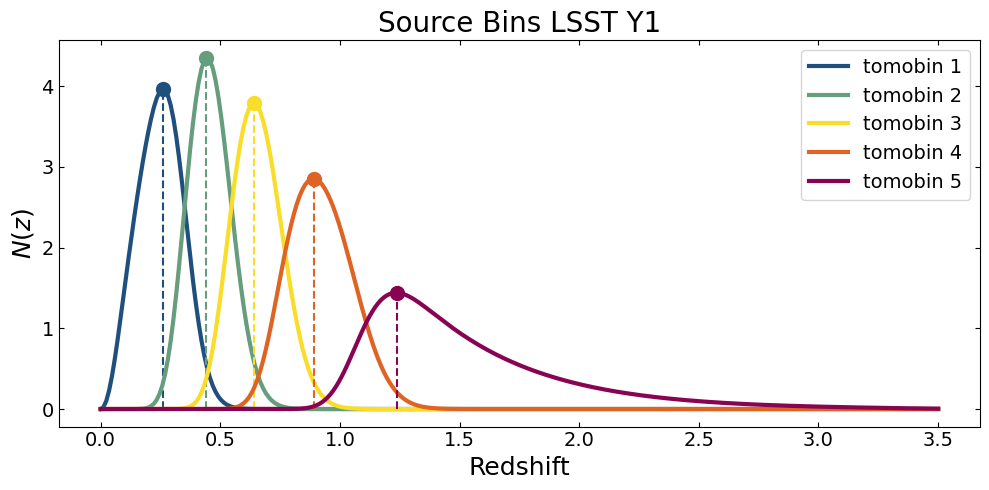

In [13]:
plt.figure(figsize=(10, 5))

source_colors = ph.get_colors(len(source_bins))
lw = 3

# Plot for source bins
for i in source_bins.keys():
    plt.plot(redshift_range, source_bins[i], lw=lw, c=source_colors[i], label=f"tomobin {i+1}")
    plt.vlines(x=source_bin_centers[i], ymin=0, ymax=np.max(source_bins[i]), color=source_colors[i], linestyle='--')
    plt.scatter(source_bin_centers[i], np.max(source_bins[i]), color=source_colors[i], s=100)

# Add labels, legend, and title
plt.legend(loc='upper right', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14, direction='in', top=True, right=True)
plt.xlabel("Redshift", fontsize=18)
plt.ylabel("$N(z)$", fontsize=18)
plt.title(f"Source Bins LSST Y{forecast_year}", fontsize=20)

# Save and show the plot
plt.tight_layout()
plt.savefig(f"{plot_path}source_bins_y{forecast_year}.png")
plt.show()


In [5]:
%%time
#tomo_peaks_zres_sweep = nzm.tomo_peaks_zres_sweep()
zres_fname = f"tomo_peaks_zres_sweep_y{forecast_year}_zmax{redshift_max}_ccl_v{ccl_version}.npy"
tomo_peaks_zres_sweep = np.load(f"{data_path}{zres_fname}", allow_pickle=True).item()

CPU times: user 2.39 ms, sys: 2.62 ms, total: 5.01 ms
Wall time: 5.35 ms


In [6]:
%%time
#tomo_peaks_zres_and_zmax_sweep = nzm.tomo_peaks_zres_and_zmax_sweep()
zres_zmax_fname = f"tomo_peaks_zres_and_zmax_sweep_y{forecast_year}_zmax_range_3.0_to_4.0_ccl_v{ccl_version}.npy"
tomo_peaks_zres_and_zmax_sweep = np.load(f"{data_path}{zres_zmax_fname}", allow_pickle=True).item()

CPU times: user 15.9 ms, sys: 5.42 ms, total: 21.4 ms
Wall time: 20.4 ms


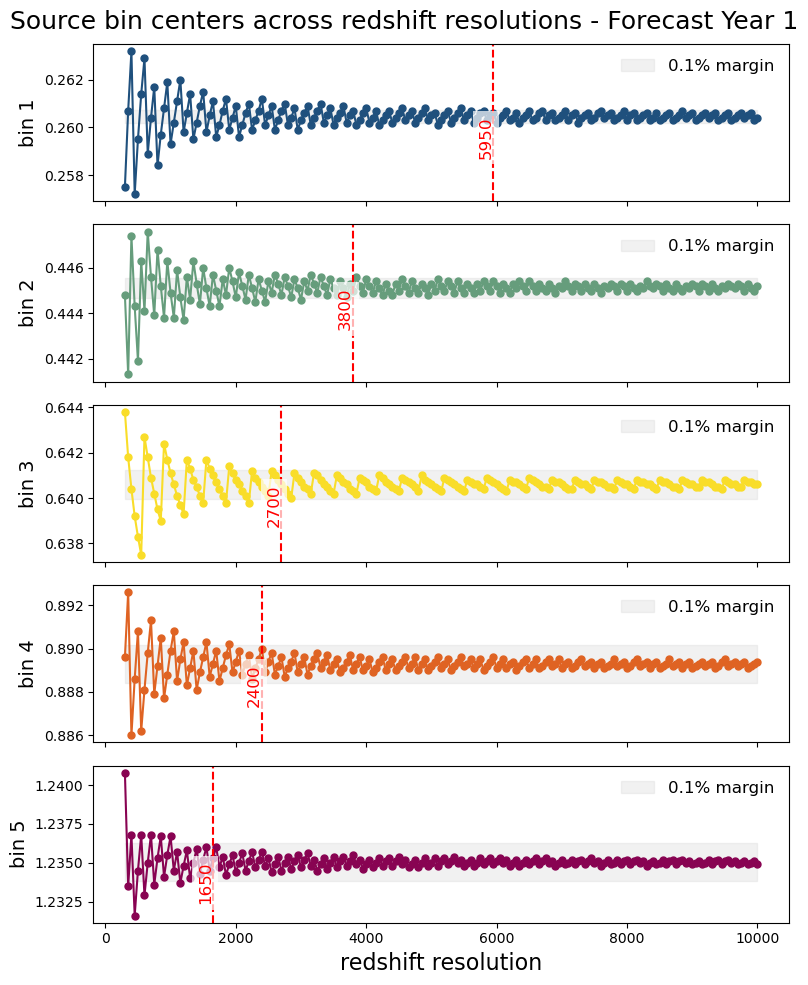

In [7]:
p.plot_tomo_peaks_zres_sweep(tomo_peaks_zres_sweep,
                             zmax=redshift_max,
                             forecast_year=forecast_year,
                             bin_type="source",
                             precision=0.1
                            )

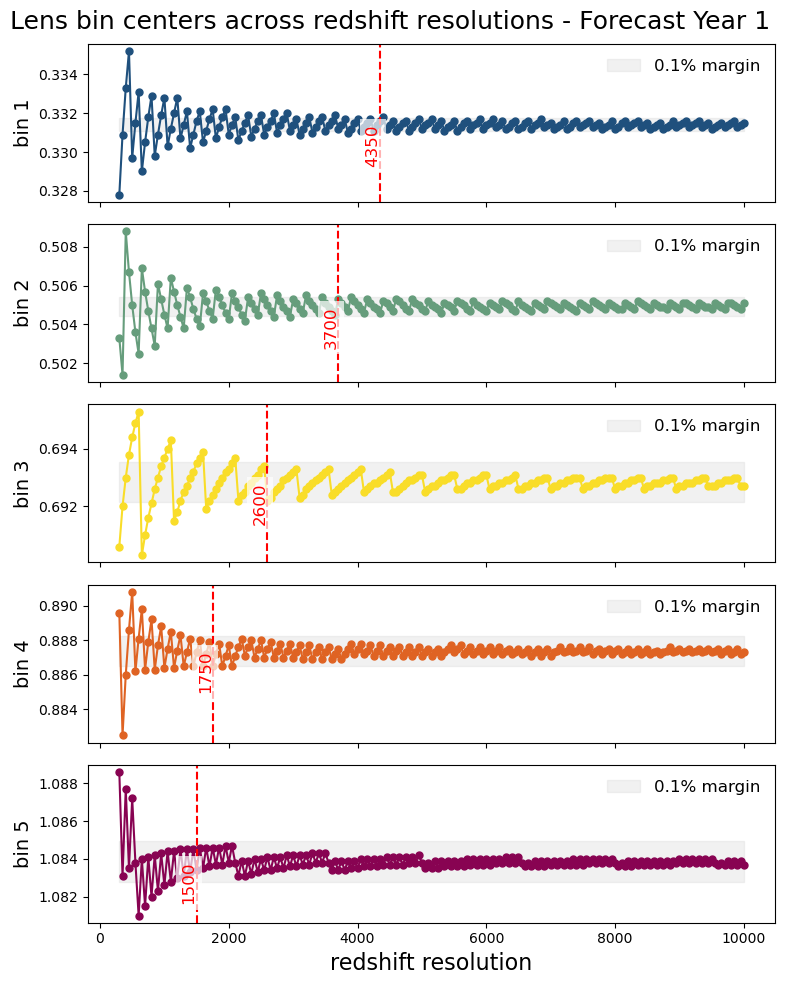

In [8]:
p.plot_tomo_peaks_zres_sweep(tomo_peaks_zres_sweep,
                             zmax=redshift_max,
                             forecast_year=forecast_year,
                             bin_type="lens",
                             precision=0.1
                            )

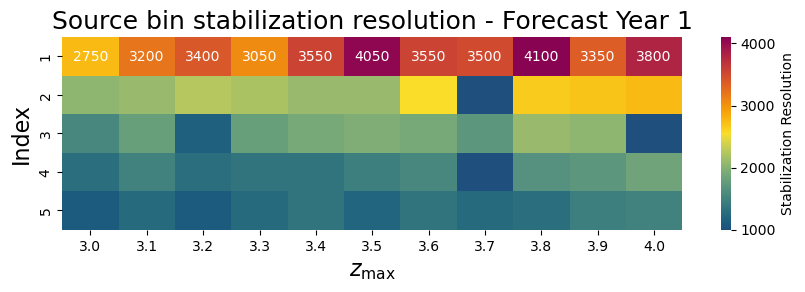

In [9]:
# Note: if you see a blank cell in the heatmap, it means that we are out of range aka
# there are no stable values for the particualr tomo bin in terms of the combination of
# tolerance margin and number of stability steps.
# You can adjust either/or the percentage or the stability steps and rerun the cell.
p.plot_tomo_peaks_zres_and_zmax_sweep(tomo_peaks_zres_and_zmax_sweep,
                                                bin_type="source",
                                                forecast_year=forecast_year,
                                                precision=0.2,
                                                stability_steps=15,
                                                annotate_max=True)

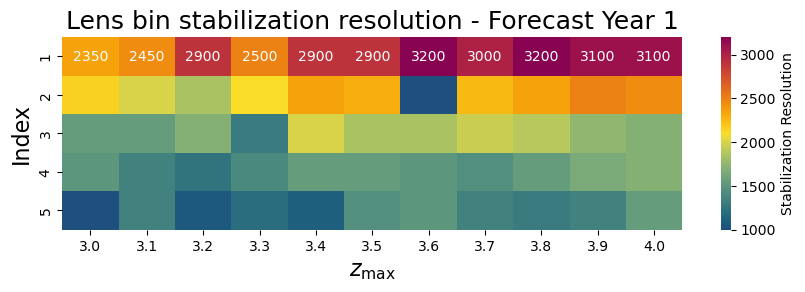

In [10]:
# Note: if you see a blank cell in the heatmap, it means that we are out of range aka
# there are no stable values for the particualr tomo bin in terms of the combination of
# tolerance margin and number of stability steps.
# You can adjust either/or the percentage or the stability steps and rerun the cell.
p.plot_tomo_peaks_zres_and_zmax_sweep(tomo_peaks_zres_and_zmax_sweep,
                                                bin_type="lens",
                                                forecast_year=forecast_year,
                                                precision=0.2,
                                                stability_steps=15,
                                                annotate_max=True)

In [ ]:
percs = np.linspace(0.005, 1, num=10)
p.plot_stabilization_vs_precision(tomo_peaks_zres_sweep,
                                  bin_type="source",
                                  forecast_year=forecast_year,
                                  precisions=percs,
                                  stability_steps=15,
                                  suptitle_padding=0.9)

In [ ]:
p.plot_stabilization_vs_precision(tomo_peaks_zres_sweep,
                                  bin_type="lens",
                                  forecast_year=forecast_year,
                                  precisions=percs,
                                  stability_steps=10,
                                  suptitle_padding=0.9)

## Testing the more close-to-data-analysis bin centers

In [14]:
num_draws = 10**8
seed = 42
num_pts = 200
suffix = f"_numdraws{num_draws:.0e}_seed{seed}_numpts{num_pts}_ccl_v{ccl_version}.npy"

In [ ]:
%%time
# Uncomment the following line to generate the draws. This will take a while.
# Instead, we will load the draws from the data_output folder since we generated them already.
#source_hist_draws = nzm.generate_tomo_draws(bin_type="source", num_draws=num_draws)
#lens_hist_draws = nzm.generate_tomo_draws(bin_type="lens", num_draws=num_draws)


In [15]:
%%time

source_hist_name = f"source_tomo_bin_draws_y{forecast_year}{suffix}"
source_hist_draws = np.load(f"{data_path}{source_hist_name}", allow_pickle=True)
lens_hist_name = f"lens_tomo_bin_draws_y{forecast_year}{suffix}"
lens_hist_draws = np.load(f"{data_path}{lens_hist_name}", allow_pickle=True)

CPU times: user 3.12 ms, sys: 10.2 ms, total: 13.3 ms
Wall time: 22.7 ms


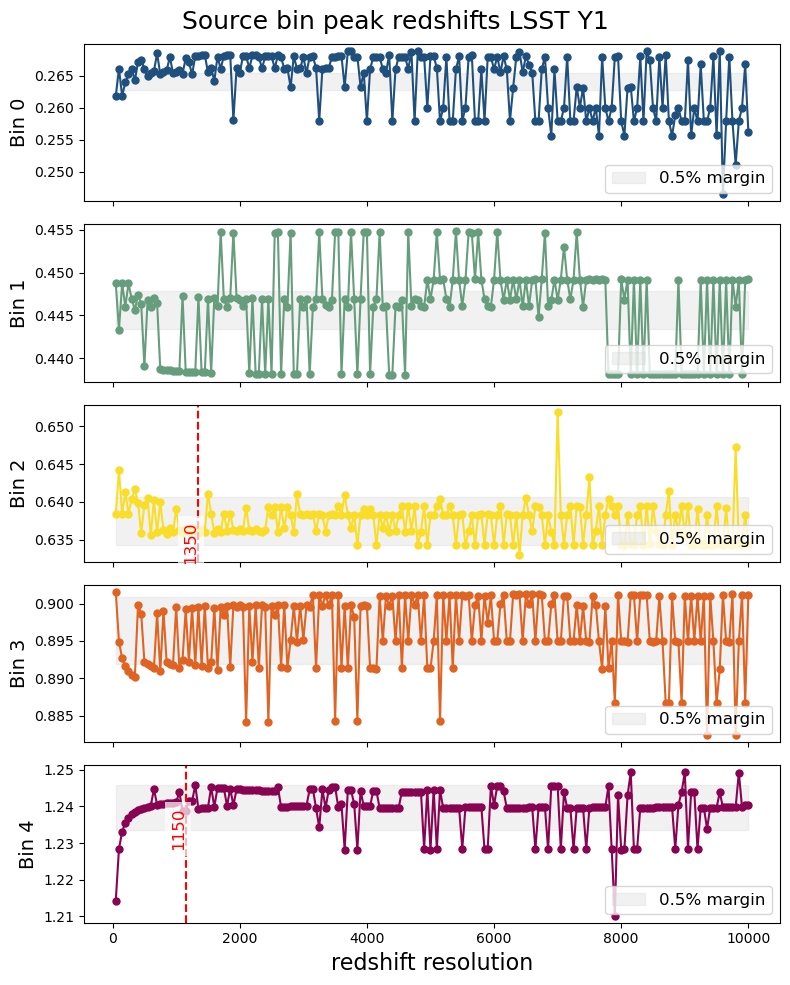

In [21]:
p.plot_tomo_draw_resolution_sweep(source_hist_draws,
                                  "source",
                                  title="Source bin peak redshifts",
                                  forecast_year=forecast_year,
                                  precision=0.5,
                                  stability_steps=20,
                                  marker_size=5)

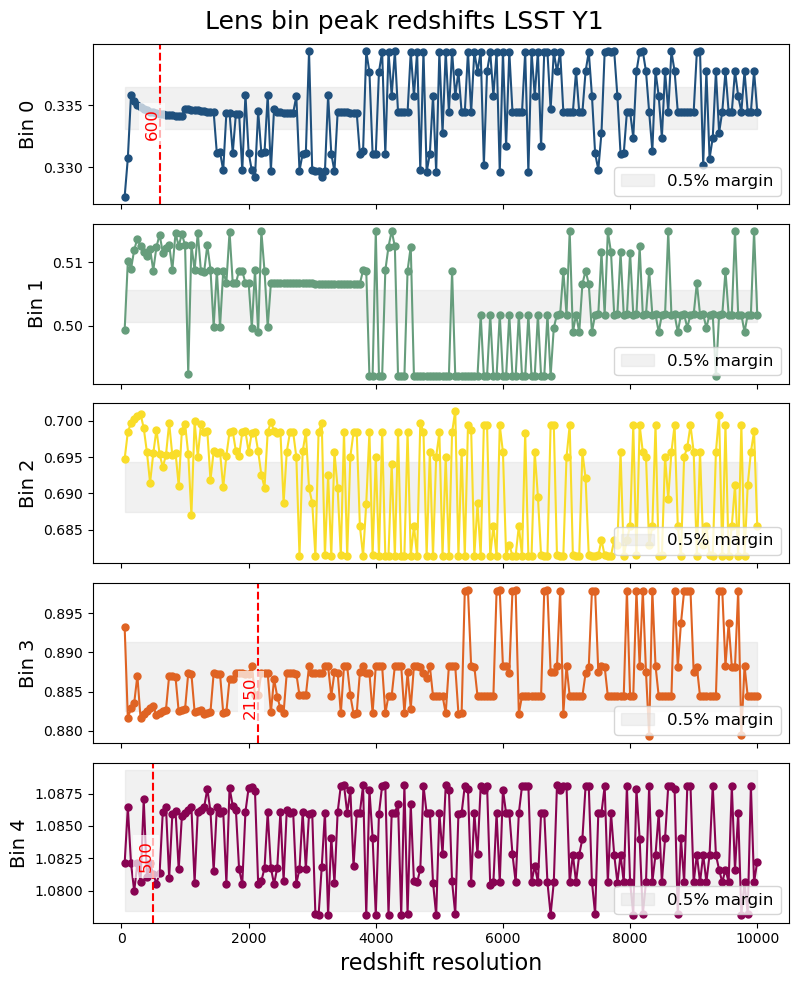

In [20]:
p.plot_tomo_draw_resolution_sweep(lens_hist_draws,
                                  "lens",
                                  title="Lens bin peak redshifts",
                                  forecast_year=forecast_year,
                                  precision=0.5,
                                  stability_steps=10,
                                  marker_size=5)